### Importing modules and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox 
from sklearn import preprocessing
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading latest Dataset

In [4]:
oil=pd.read_excel('Brent.xls', index_col=[0],parse_dates = [0] )

## EDA

In [6]:
oil.head(10)

,SpotPrice
Date,
2016-10-03,48.61
2016-10-04,48.81
2016-10-05,49.57
2016-10-06,50.14
2016-10-07,50.49
2016-10-10,51.54
2016-10-11,50.48
2016-10-12,49.53
2016-10-13,49.29


In [7]:
oil.tail(10)

,SpotPrice
Date,
2021-11-09,84.52
2021-11-10,82.91
2021-11-11,83.40
2021-11-12,82.90
2021-11-15,81.94
2021-11-16,82.85
2021-11-17,80.67
2021-11-18,82.45
2021-11-19,80.24


In [9]:
type(oil)

pandas.core.frame.DataFrame

In [11]:
oil.describe()

,SpotPrice
count,1309.000000
mean,59.626753
std,13.479875
min,9.120000
25%,50.960000
50%,61.500000
75%,69.290000
max,86.070000


In [12]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1309 entries, 2016-10-03 to 2021-11-22
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SpotPrice  1309 non-null   float64
dtypes: float64(1)
memory usage: 20.5 KB


In [13]:
oil.shape

(1309, 1)

In [14]:
oil.isnull().sum()

SpotPrice    0
dtype: int64

In [15]:
oil.dtypes

SpotPrice    float64
dtype: object

##### Converting into series

In [16]:
series_value = oil.values
series_value

array([[48.61],
       [48.81],
       [49.57],
       ...,
       [82.45],
       [80.24],
       [80.97]])

#type(series_value)

### Visualization

<AxesSubplot:xlabel='Date'>

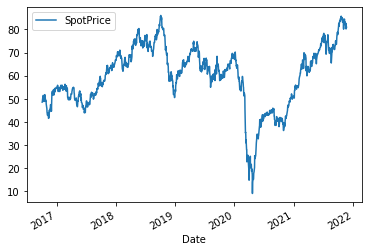

In [17]:
oil.plot()

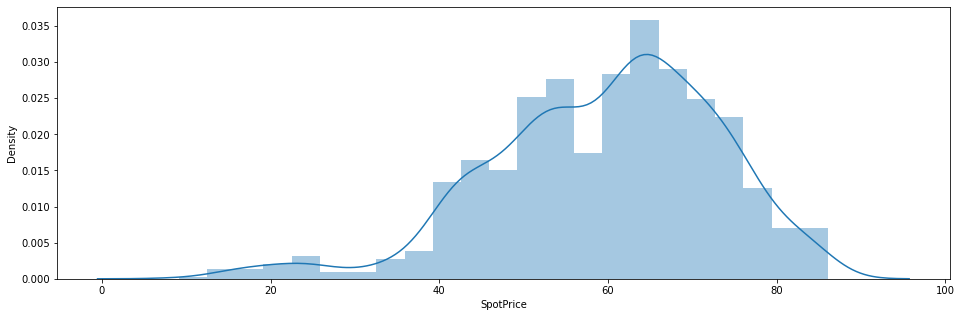

In [18]:
plt.figure(figsize=(16,5))
sns.distplot(oil['SpotPrice'])
plt.show()

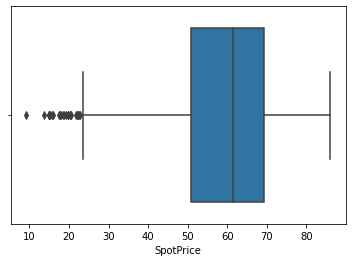

In [19]:
sns.boxplot(oil['SpotPrice'])
plt.show()

Inferences : As we can find outliers in Dataset hence it needs to be treated for un-biased results hence treating outliers via boxcox transformation

## Treating Outlier 

### Standardizing
As data is not normally distributed and have outliers. It becomes necessary to transform it to normal distribution for better model accuracy. 

An alternative to manually trying a variety of transformations is the Box Cox transformation. For each variable, a Box Cox transformation estimates the value lambda from -5 to 5 that maximizes the normality of the data using the equation below

For negative values of lambda, the transformation performs a variant of the reciprocal of the variable. At a lambda of zero, the variable is log transformed, and for positive lambda values, the variable is transformed the power of lambda. We can apply “boxcox” to all the skewed variables in the dataframe “data1” using Scipy.stats. 

In [27]:
for i in oil:
    oil[i],lmbda=boxcox(oil[i], lmbda=None)

In [28]:
oil

,SpotPrice
Date,
2016-10-03,551.847177
2016-10-04,555.892428
2016-10-05,571.381441
2016-10-06,583.119547
2016-10-07,590.378567
...,...
2021-11-16,1423.385726
2021-11-17,1357.557274
2021-11-18,1411.205435


<AxesSubplot:ylabel='Density'>

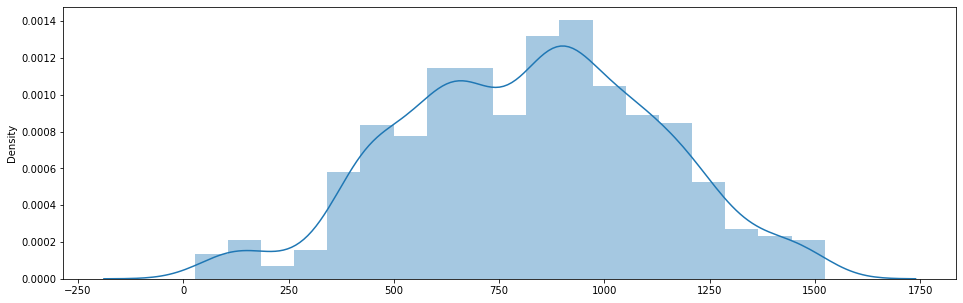

In [29]:
plt.figure(figsize=(16,5))
sns.distplot(oil)

<AxesSubplot:xlabel='SpotPrice'>

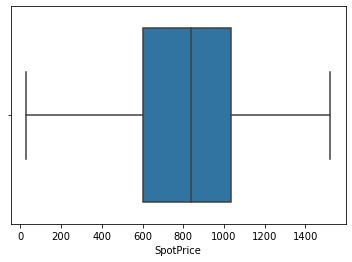

In [30]:
sns.boxplot(oil['SpotPrice'])

<AxesSubplot:xlabel='Date'>

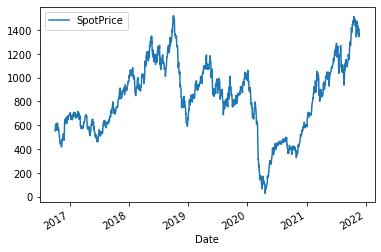

In [31]:
oil.plot()

In [36]:
oil.describe()

,SpotPrice
count,1309.000000
mean,821.840483
std,301.897262
min,26.879581
25%,600.187798
50%,838.359818
75%,1036.237456
max,1523.093508


Inference: Skewness reduced and now data is transformed to be normally distributed.

### Lagplot

In [37]:
oil

,SpotPrice
Date,
2016-10-03,551.847177
2016-10-04,555.892428
2016-10-05,571.381441
2016-10-06,583.119547
2016-10-07,590.378567
...,...
2021-11-16,1423.385726
2021-11-17,1357.557274
2021-11-18,1411.205435


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

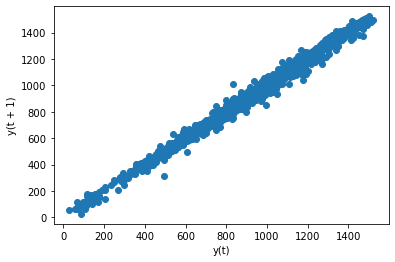

In [38]:
from pandas.plotting import lag_plot

lag_plot(oil['SpotPrice'])

### ACF and PACF plot

In [51]:
#from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [52]:
#fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(oil['SpotPrice'].iloc[6:],lags=12)
#ax1 = fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(oil['SpotPrice'].iloc[6:],lags=12)

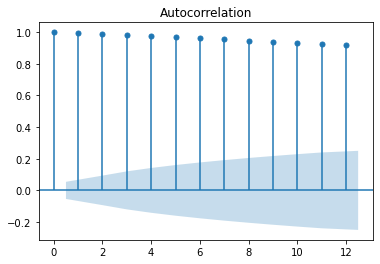

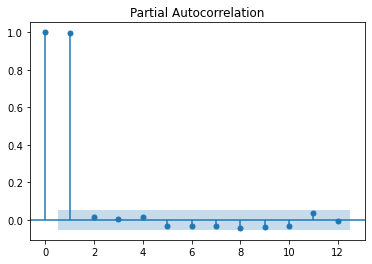

In [53]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(oil['SpotPrice'],lags=12)
tsa_plots.plot_pacf(oil['SpotPrice'],lags=12)
plt.show()

### Decomposition plot

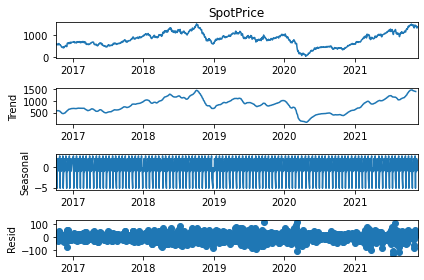

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(oil['SpotPrice'],period=12,model='additive')
decompose_ts_add.plot()
plt.show()

### Testing For Stationarity using Dickey-Fuller Test to transformed data

### Stationarity Check
- Method 1 - Rolling Statistics
- Method 2 - Dicky Fuller

In [55]:
 def test_stationarity(timeseries):
    """ Fucntion to plot the moving variance and apply Dickey Fuller Test"""
    rolmean = timeseries.rolling(window=52, center=False).mean()
    rolstd = timeseries.rolling(window=52, center=False).std()
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original Time Series Data')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Standard Deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print('Results of Dickey-Fuller Test:\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value' ,'#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value {key}'] = value
        
    
    print(dfoutput)

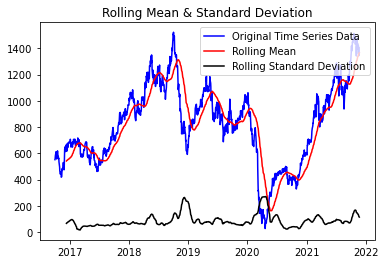

Results of Dickey-Fuller Test:

Test Statistics                  -1.464216
p-value                           0.551133
#Lags Used                        0.000000
Number of Observations Used    1308.000000
Critical Value 1%                -3.435359
Critical Value 5%                -2.863752
Critical Value 10%               -2.567948
dtype: float64


In [56]:
test_stationarity(oil)

#### Inferneces : weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

### Differencing

In [57]:
oil_diff= oil['SpotPrice'] - oil['SpotPrice'].shift(1)
oil_diff

Date
2016-10-03          NaN
2016-10-04     4.045251
2016-10-05    15.489013
2016-10-06    11.738106
2016-10-07     7.259019
                ...    
2021-11-16    27.643965
2021-11-17   -65.828452
2021-11-18    53.648161
2021-11-19   -66.472076
2021-11-22    21.802225
Name: SpotPrice, Length: 1309, dtype: float64

In [58]:
oil_diff.dropna()

Date
2016-10-04     4.045251
2016-10-05    15.489013
2016-10-06    11.738106
2016-10-07     7.259019
2016-10-10    22.011068
                ...    
2021-11-16    27.643965
2021-11-17   -65.828452
2021-11-18    53.648161
2021-11-19   -66.472076
2021-11-22    21.802225
Name: SpotPrice, Length: 1308, dtype: float64

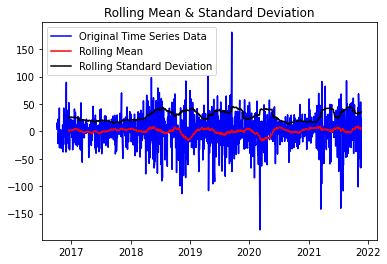

Results of Dickey-Fuller Test:

Test Statistics                 -26.644772
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1306.000000
Critical Value 1%                -3.435367
Critical Value 5%                -2.863756
Critical Value 10%               -2.567950
dtype: float64


In [59]:
oil_diff.dropna(inplace=True)
test_stationarity(oil_diff)

### log transformation

In [60]:
#oil_log = np.log(oil)
#oil_log_diff = oil_log - oil_log.shift()
#_ = plt.plot(oil_log_diff)

In [61]:
#oil_log_diff.dropna(inplace=True)
#test_stationarity(oil_log_diff)

<AxesSubplot:xlabel='Date'>

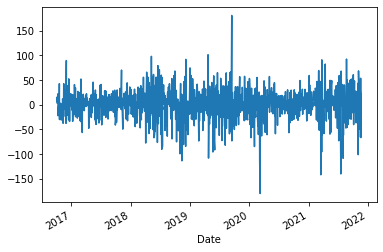

In [62]:
oil_diff.plot()

In [63]:
#TestStationary.Plot(oil_diff)

### Decomposition plot after differencing

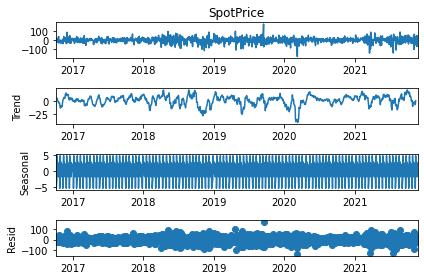

In [64]:
decompose_ts_add = seasonal_decompose(oil_diff.dropna(),period=12)
decompose_ts_add.plot()
plt.show()

### ACF and PACF plot after differencing

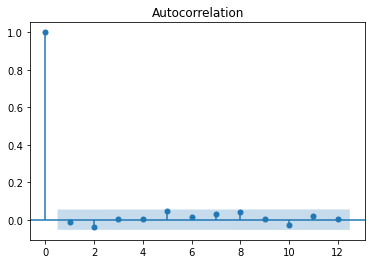

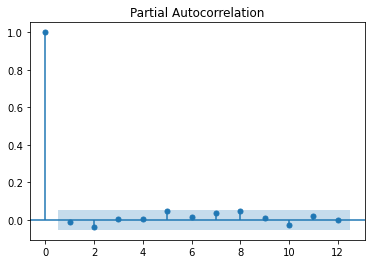

In [65]:
tsa_plots.plot_acf(oil_diff.dropna(),lags=12)
tsa_plots.plot_pacf(oil_diff.dropna(),lags=12)
plt.show()

Inferences: In PACF plot we can clearly observe that at 1 correlation is shuting hence P value can be considered as 1 and ACR we can observe that correlation is exponentially decreased at value 1 hence either we can consider it as 0 or 1 hence q value is 1 and as we did only 1 time seasonal differencing hence d value is 1. 

In [66]:
oil

,SpotPrice
Date,
2016-10-03,551.847177
2016-10-04,555.892428
2016-10-05,571.381441
2016-10-06,583.119547
2016-10-07,590.378567
...,...
2021-11-16,1423.385726
2021-11-17,1357.557274
2021-11-18,1411.205435


In [67]:
oil_diff

Date
2016-10-04     4.045251
2016-10-05    15.489013
2016-10-06    11.738106
2016-10-07     7.259019
2016-10-10    22.011068
                ...    
2021-11-16    27.643965
2021-11-17   -65.828452
2021-11-18    53.648161
2021-11-19   -66.472076
2021-11-22    21.802225
Name: SpotPrice, Length: 1308, dtype: float64

Inferences: Now we can observe above that data is stationary hence aborting the differencing method to proceed further.

Note: the differencing method is done on purely experimental basis. We have first tried with 1 day shift and 12 day shift

### Auto Regressive Model

![image.png](attachment:image.png)

Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step.

It is a very simple idea that can result in accurate forecasts on a range of time series problems.

yt-1, yt-2....yt-p is nothing but lags. 

It helps in determine, In order to predict the SpotPrice of today how many previous day data we actually have to consider and this can only be done by auto co-relation plot.model


Final Thoughts on Autocorrelation and Partial Autocorrelation

    Identification of an AR model is often best done with the PACF.
        For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

    Identification of an MA model is often best done with the ACF rather than the PACF.

        For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

        p,d,q p AR model lags d differencing q MA lags

Note: ARIMA is composed of 3 parts, AR = Auto Regression, I = Integrated (Differencing) and MA = Moving Average.

      In ARIMA model we consider 3 values P = AR model lags, d =  differencing and q = Moving average lags 


In [69]:
#p--pACF---0    d--differenin---1 q---acf---0  order 010

### ARIMA Model

In [70]:
#p=0 , d= 1, q = 0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [71]:
model = ARIMA(oil_diff, order = (0,1,0))
model_fit = model.fit()

In [72]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.SpotPrice   No. Observations:                 1307
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -6764.425
Method:                           css   S.D. of innovations             42.803
Date:                Wed, 26 Jan 2022   AIC                          13532.850
Time:                        19:39:41   BIC                          13543.201
Sample:                             1   HQIC                         13536.733
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0136      1.184      0.011      0.991      -2.307       2.334
==============================================================================
"""

In [73]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [74]:
for param in pdq:
    try:
        model_arima = ARIMA(oil_diff.dropna(),order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 12622.318485415655
(0, 0, 1) 12624.166246911132
(0, 0, 2) 12624.307363966422
(0, 0, 3) 12626.178743792796
(0, 0, 4) 12628.142080920397
(0, 1, 0) 13532.850458942252
(0, 1, 1) 12622.656249938
(0, 1, 2) 12624.522054003157
(0, 1, 3) 12624.719545025517
(0, 1, 4) 12626.57761358399
(0, 2, 0) 14944.295834020264
(0, 2, 1) 13532.673918478364
(0, 2, 2) 12637.760558103788
(0, 2, 3) 12641.3349811478
(0, 2, 4) 12642.415246920677
(1, 0, 0) 12624.177797561306
(1, 0, 1) 12625.734790515042
(1, 0, 2) 12622.879680841485
(1, 0, 3) 12623.713550480734
(1, 0, 4) 12625.229134883593
(1, 1, 0) 13182.16294901675
(1, 1, 1) 12624.532138684659
(1, 1, 2) 12622.455098760673
(1, 1, 3) 12623.252066697865
(1, 1, 4) 12626.479295311674
(1, 2, 0) 14225.981978793881
(1, 2, 3) 12637.989362423838
(2, 0, 0) 12624.275327134044
(2, 0, 1) 12622.93060531927
(2, 0, 2) 12624.58214018905
(2, 0, 3) 12624.629915458476
(2, 0, 4) 12624.485480527466
(2, 1, 0) 13007.157024370736
(2, 1, 1) 12624.68622539992
(2, 1, 2) 12626.63670483

#### Splitting Dataset

In [75]:
train_ar = oil_diff.head(1083)
test_ar = oil_diff.tail(226)

In [76]:
train_ar

Date
2016-10-04     4.045251
2016-10-05    15.489013
2016-10-06    11.738106
2016-10-07     7.259019
2016-10-10    22.011068
                ...    
2020-12-28     0.000000
2020-12-29    -9.174004
2020-12-30     6.248315
2020-12-31    10.056885
2021-01-04   -17.759014
Name: SpotPrice, Length: 1083, dtype: float64

In [77]:
test_ar

Date
2021-01-04   -17.759014
2021-01-05    59.149723
2021-01-06    13.915231
2021-01-07    -2.182746
2021-01-08    39.992806
                ...    
2021-11-16    27.643965
2021-11-17   -65.828452
2021-11-18    53.648161
2021-11-19   -66.472076
2021-11-22    21.802225
Name: SpotPrice, Length: 226, dtype: float64

In [78]:
train_ar = pd.DataFrame(train_ar)

In [79]:
train_ar

,SpotPrice
Date,
2016-10-04,4.045251
2016-10-05,15.489013
2016-10-06,11.738106
2016-10-07,7.259019
2016-10-10,22.011068
...,...
2020-12-28,0.000000
2020-12-29,-9.174004
2020-12-30,6.248315


#### Evaluation metric as MAPE (Mean Absolute Percentage Error)

# ARIMA

In [82]:
from sklearn.metrics import mean_absolute_percentage_error

In [83]:
ARIMAmodel = ARIMA(train_ar, order=(0, 1, 0)) #notice p,d and q value here
ARIMA_model_fit = ARIMAmodel.fit()

ARIMA_pred = ARIMA_model_fit.predict(1083,1308,typ='levels')
mean_absolute_percentage_error(test_ar,ARIMA_pred)*100

4.334031751599167e+16

Inferences : As there is a seansonality in dataset ARIMA model is not considered to be best and SARIMA model works best in cases of Seasonality in dataset hence using SARIMA model for predictions

# SARIMA

#### Considering Seasonality in Arima it becomes SARIMA

#### Testset

In [84]:
import statsmodels.api as sm
SARIMAmodel = sm.tsa.statespace.SARIMAX(train_ar, order=(0,1,0),seasonal_order = (0,1,0,5))
SARIMA_model_fit = SARIMAmodel.fit()

SARIMA_pred = SARIMA_model_fit.predict(1083,1308,typ='levels')
mean_absolute_percentage_error(test_ar,SARIMA_pred)*100

1.1192681593751752e+18

#### Trainset

In [85]:
import statsmodels.api as sm
SARIMAmodel1 = sm.tsa.statespace.SARIMAX(train_ar, order=(0,1,0),seasonal_order = (0,1,0,5))
SARIMA_model_fit1 = SARIMAmodel1.fit()

SARIMA_pred1 = SARIMA_model_fit1.predict(1,1083,typ='levels')
mean_absolute_percentage_error(train_ar,SARIMA_pred1)*100

1.310831514216429e+17